# Gravitational Waves & Detection Using a Convolutional Neural Network

### Abstract

We explore the physical, mathematical, and historical aspects surrounding gravitational waves, followed by training a convolutional neural network (CNN) to distinguish spectrogram images with gravitational events from non-detection events.

### Gravitational Waves & Their Sources

Gravitational waves are ripples in spacetime propagating at the speed of light and generated by the movement of large masses. There are many sources of gravitational waves/radiation, one of them being compact binary mergers, i.e. the merging of two compact objects such as black holes, neutron stars, and white dwarfs. Another type is periodic waves such as for stars orbiting each other, or for two compact objects that go faster as they orbit each other over time, eventually merging (or maybe not). Moreover, when two galaxies merge, their central supermassive black holes get closer and eventually start orbiting each other, creating ripples, but due to the "last parsec problem," they might not actually merge. According to theory, the black holes should stay locked into orbit around each other when there's approximately one parsec between them (the orbital energy would be depleted by mechanisms such as gravitational wave emission, impeding the black holes from merging within the age of the universe), but the problem is that observations indicate that black hole mergers do indeed occur. If they were to merge, such an event would be very violent, would produce a great amount of energy, and would send massive ripples through spacetime [1]. Another property related to black hole mergers is Hawking's black hole area theorem. This theorem postulates that the total surface area of the horizon of classical black holes cannot decrease over time. Following this logic, if two black holes merge, the resulting black hole cannot have a smaller surface area than the combined horizon area of its progenitor black holes, which imposes a limit to how much gravitation can be radiated away. In fact, in one study, pre- and post merger data from LIGO's first detection [2] was analyzed, confirming with 95% confidence that the total area after the merger did not decrease [3]. Lastly, there can be other sources of gravitational radiation such as supernovae, and other types of gravitational waves such as continuous, stochastic, primordial, and burst [4] [5].

### Weak Field Limit & Linearizing Gravity

Gravity is extremely strong near relativistic sources like compact mergers and stellar core collapses due to its non-linearity, where mass and energy create curvature in spacetime which itself creates more curvature in spacetime and is associated with energy. However, gravitational waves that have traveled many parsecs become extremely weak by the time they reach us. As a side note, the reason why we're able to detect events so far out is that the gravitational wave's amplitude has an inverse $R$ dependence, as opposed to decreasing by $R^2$, which is what its energy does for example.

In a weak gravitational field, the metric tensor $g_{\mu\nu}$ can be considered as a minor deviation, represented by the perturbation $h_{\mu\nu}$, from the Minkowski metric $\eta_{\mu\nu}$ of flat spacetime:
$$g_{\mu\nu} = \eta_{\mu\nu} + h_{\mu\nu}$$

The condition $\left| h_{\mu\nu} \right| \ll 1$ in the weak-field limit tells us that the perturbations, which represent gravitational waves, are significantly smaller than the Minkowski metric, again, showing the minor deviation from flatness. Still in the weak-field limit, we can now linearize the Einstein field equations that would otherwise be very complex and non-linear to the following simplified form:
$$\Box \bar{h}^{\mu\nu} = -16\pi G T^{\mu\nu}$$

where the differential operator $\Box = g^{\mu\nu}\frac{\partial}{\partial x^{\mu}} \frac{\partial}{\partial x^{\nu}}$, $\bar{h}^{\mu\nu}$ is the trace-reversed gauge choice of the perturbation, and $T^{\mu\nu}$ is the stress-energy tensor.
This linearized equation is used to describe how these waves propagate.

Furthermore, we can see that just as changing electric and magnetic fields propagate as electromagnetic waves, changing gravitational fields propagate as gravitational waves. Another way to look at this analogy is how moving charges and moving mass-energy are similar to each other in that they create their respective radiation. And just as electromagnetic waves carry energy, momentum, and information about their sources, so do gravitational waves. The detection of gravitational waves has been an important confirmation of Einstein's theory of general relativity, as it directly observes this analogous radiation. One last thing to note, however, is that unlike dipole electromagnetic radiation, gravitational radiation is quadrupolar, and electromagnetism is linear as opposed to gravity (when we're not dealing with the weak-field limit).


### Historical Account & Detectors

Gravitational waves were first predicted by Einstein in his theory of general relativity. The first detection of these waves was achieved in 2015 by LIGO [2] (in collaboration with Virgo), providing strong confirmation to Einstein's theory. Actually, the first gravitational radiation to be detected was by LIGO and not Virgo because the wave pointed along one of the arms of Virgo, which is why it's good to have multiple detectors. Moreover, the way these detectors work is they split a laser beam in two, sending each down one of two orthogonal interferometer arms (which have phenomenal sensitivity of about 1/10000th the width of a proton [6]). At the end of the arms there are mirrors that reflect back the beams, and the beams have a destructive interference when recombining. The way these detectors sense gravitational waves is one the arms gets squeezed while the other elongated when a gravitational wave passes by (how much the interferometer arm changes is related to the metric deviation), and as a result, the combined signal now doesn't destructively interfere anymore, so there will be a signal at the photodetector. Having multiple detectors is important to pinpoint the source of the gravitational waves but also for cross-verification, as even a passing truck could create detectable deviations.








### Training a Convolutional Neural Network on LIGO data to detect gravitational wave events

The goal here was to train a CNN to recognize whether the signal it's receiving is from a gravitational wave from space by classifying spectrogram images as either gravitational wave events or non-detection events. Each event is represented as two spectrograms, resembling photographs or images of the signals recorded at two distinct detector sites: LIGO Hanford (H1) and LIGO Livingston (L1). A spectrogram is designed to map frequencies on the Y-axis and time on the X-axis, while also illustrating the strength of the signal through the intensity of colors — the brighter the color, the greater the energy of the signal. Essentially, a spectrogram provides a visual account of how the signal's strength varies across the different frequencies present in the signal. Moreover, each event comprises 39 distinct frequency components, and each of these frequencies is characterized by 100 specific time components. These time components signify the normalized power of their respective frequency component at a particular time, with measurements taken from the two distinct sites: H1 and L1. The specific LIGO data files used — GW_aug.npy (1568 gravitational events) and ND_aug.npy (1216 non-detection events) — were provided by Michel Kana's GitHub repository [7], while the data description used here and the code used for plotting and processing the original data can be found in his Towards Data Science article [8].

For the CNN, we use Keras to build the following architecture:

1. A 2D convolutional layer with 32 filters, each of size 3x3, that uses a ReLU activation function.
2. A 2D max pooling layer with a pool size of 2x2 for downsampling purposes.
3. A 2D convolutional layer with 64 filters, each also of size 3x3, that uses a ReLU activation function.
4. Another 2D max pooling layer with a pool size of 2x2.
5. A flatten layer necessary to transition from the previous 2D layers to the upcoming 1D layers.
6. A fully connected layer with 128 neurons and ReLU activation.
7. A dropout layer with a dropout rate 0.5 to help prevent overfitting.
8. Finally a fully connected layer with two neurons and softmax activation, though sigmoid could also be used in this case since it's binary classification.

The model is then compiled with the following:

Adam as the optimizer, sparse categorical cross-entropy as the loss (though binary cross-entropy could work as well since it's binary classification), and accuracy as the performance metric.

The model performed very well with 100% accuracy, and to make sure this wasn't a result of overfitting (i.e. not being able to generalize to new data because the model learned the training data too well), we look at the validation accuracy (which is based off data the model hasn't seen yet), which is still above 99%. To confirm this further, the ROC AUC was 1.0. As a final check, to make sure that the specific train test split used wasn't randomly favorable, we ran a new model with identical architecture on a different permutation of train test split, and by doing so, we achieved above 99% accuracy with similar validation accuracy and ROC AUC as before, confirming the strength of our model.

The saliency map examples at the end reflect how relevant pixels were for classification. For gravitational events, their signatures can be seen from their corresponding saliency map.

Please refer to the commented code below.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from random import randint
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from keras import regularizers
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

file_path = '/content/drive/My Drive/grav_waves/GW_aug.npy'
if os.path.exists(file_path):
    print("File found.")
else:
    print("File not found. Check the path.")

File found.


In [ ]:
print(os.getcwd())

/content


In [ ]:
GW = np.load('drive/My Drive/grav_waves/GW_aug.npy')

ND = np.load('drive/My Drive/grav_waves/ND_aug.npy')

In [ ]:
print(GW.shape)

print(ND.shape)

(1568, 39, 100, 2)
(1216, 39, 100, 2)


In [ ]:
# Plot the H1 and L1 spectograms for a given event
def plot_event(event=0, data=GW):
    fig, ax = plt.subplots(1,2,figsize=(5,5))
    ax[0].imshow(data[event,:,:,0])
    ax[0].set_title('Event {} - H1'.format(event))
    ax[1].imshow(data[event,:,:,1])
    ax[1].set_title('Event {} - L1'.format(event));

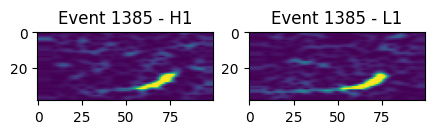

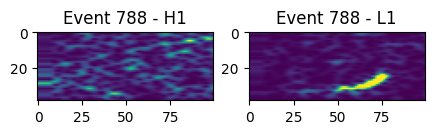

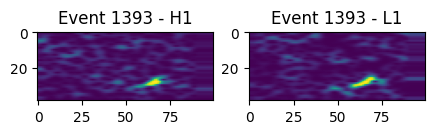

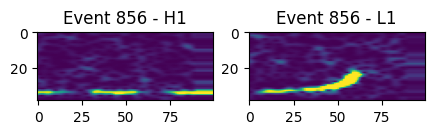

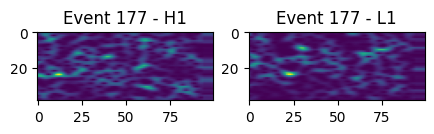

In [ ]:
# Spectrogram plots of randomly-selected gravitational events:
for i in range(5):
    i = randint(0, GW.shape[0])
    plot_event(i)

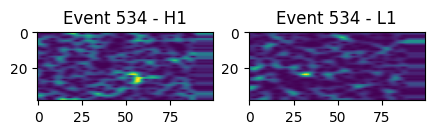

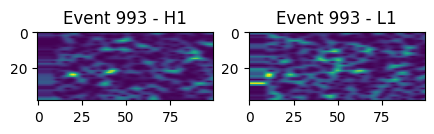

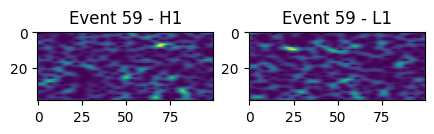

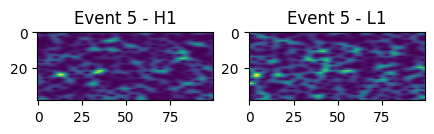

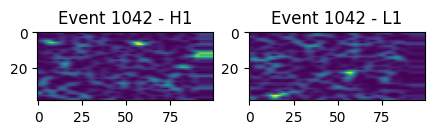

In [ ]:
# Spectrogram plots of randomly-selected non-gravitational events
for i in range(5):
    i = randint(0, ND.shape[0])
    plot_event(i, data=ND)

In [ ]:
# Normalize and shuffle the GWs and ND
GW = GW.astype('float32')/np.max(GW)
ND = ND.astype('float32')/np.max(ND)
np.random.shuffle(GW)
np.random.shuffle(ND)

# Combine the GWs with ND
X = np.append(GW, ND, axis=0)

# Create response vector that is 1 for GWs and 0 for ND
Y = np.append(np.ones((GW.shape[0],1)), np.zeros((ND.shape[0],1)), axis=0)

# Split the data as 20% test, 80% train
test_idx = np.random.choice(np.arange(0, Y.shape[0], 1),
                            size=round(.2*Y.shape[0]), replace=False)
train_idx = np.setdiff1d(np.arange(0, Y.shape[0], 1), test_idx)
X_test = X[test_idx]
y_test = Y[test_idx]
X_train = X[train_idx]
y_train = Y[train_idx]

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 37, 98, 32)        608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 23, 64)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 11776)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_accuracy}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/10
56/56 [==============================] - 12s 191ms/step - loss: 0.2138 - accuracy: 0.8995 - val_loss: 0.1184 - val_accuracy: 0.9865
Epoch 2/10
56/56 [==============================] - 10s 174ms/step - loss: 0.0653 - accuracy: 0.9775 - val_loss: 0.0235 - val_accuracy: 0.9978
Epoch 3/10
56/56 [==============================] - 11s 201ms/step - loss: 0.0382 - accuracy: 0.9871 - val_loss: 0.1458 - val_accuracy: 0.9439
Epoch 4/10
56/56 [==============================] - 9s 170ms/step - loss: 0.0211 - accuracy: 0.9961 - val_loss: 0.0160 - val_accuracy: 0.9978
Epoch 5/10
56/56 [==============================] - 10s 186ms/step - loss: 0.0065 - accuracy: 0.9994 - val_loss: 0.0313 - val_accuracy: 0.9888
Epoch 6/10
56/56 [==============================] - 11s 203ms/step - loss: 0.0125 - accuracy: 0.9955 - val_loss: 0.0255 - val_accuracy: 0.9978
Epoch 7/10
56/56 [==============================] - 9s 159ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0279 - val_accuracy: 0.9933
E

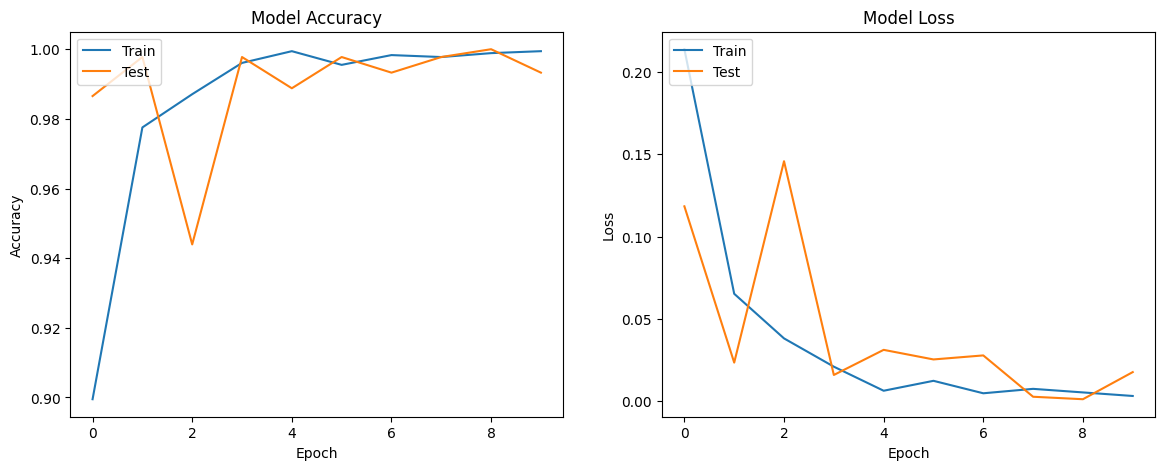

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

18/18 [==============================] - 2s 94ms/step


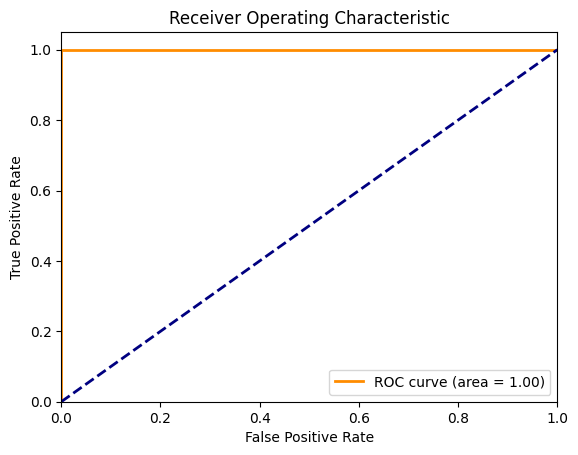

Confusion Matrix:
 [[242   0]
 [  0 315]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       242
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



In [ ]:
# Get the predicted probabilities for the positive class
y_pred_probs = model.predict(X_test)[:, 1]

# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Predict the classes based on the probability threshold (0.5)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

# Classification Report
cr = classification_report(y_test, y_pred_classes)
print('Classification Report:\n', cr)

In [ ]:
model.save('my_model')

In [ ]:
# Set a new random seed for different shuffling
np.random.seed(4242)

# Normalize and shuffle the GWs and ND
GW = GW.astype('float32') / np.max(GW)
ND = ND.astype('float32') / np.max(ND)
np.random.shuffle(GW)
np.random.shuffle(ND)

# Combine the GWs with ND
X = np.append(GW, ND, axis=0)

# Create response vector
Y = np.append(np.ones((GW.shape[0],1)), np.zeros((ND.shape[0],1)), axis=0)

# Split the data as 20% test, 80% train
test_idx = np.random.choice(np.arange(0, Y.shape[0], 1),
                            size=round(.2 * Y.shape[0]), replace=False)
train_idx = np.setdiff1d(np.arange(0, Y.shape[0], 1), test_idx)
X_test = X[test_idx]
y_test = Y[test_idx]
X_train = X[train_idx]
y_train = Y[train_idx]

In [ ]:
model_new = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model_new.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 37, 98, 32)        608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 23, 64)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 11776)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Train the model
history = model_new.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model_new.evaluate(X_test, y_test)

print(f"Test accuracy: {test_accuracy}")

# Make predictions
predictions = model_new.predict(X_test)

Epoch 1/10
56/56 [==============================] - 13s 202ms/step - loss: 0.1914 - accuracy: 0.9107 - val_loss: 0.0712 - val_accuracy: 0.9888
Epoch 2/10
56/56 [==============================] - 9s 167ms/step - loss: 0.0634 - accuracy: 0.9753 - val_loss: 0.0422 - val_accuracy: 0.9933
Epoch 3/10
56/56 [==============================] - 12s 210ms/step - loss: 0.0212 - accuracy: 0.9921 - val_loss: 0.0258 - val_accuracy: 0.9933
Epoch 4/10
56/56 [==============================] - 10s 181ms/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 0.0162 - val_accuracy: 0.9933
Epoch 5/10
56/56 [==============================] - 11s 187ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0283 - val_accuracy: 0.9933
Epoch 6/10
56/56 [==============================] - 12s 208ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0209 - val_accuracy: 0.9933
Epoch 7/10
56/56 [==============================] - 11s 195ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0744 - val_accuracy: 0.9753


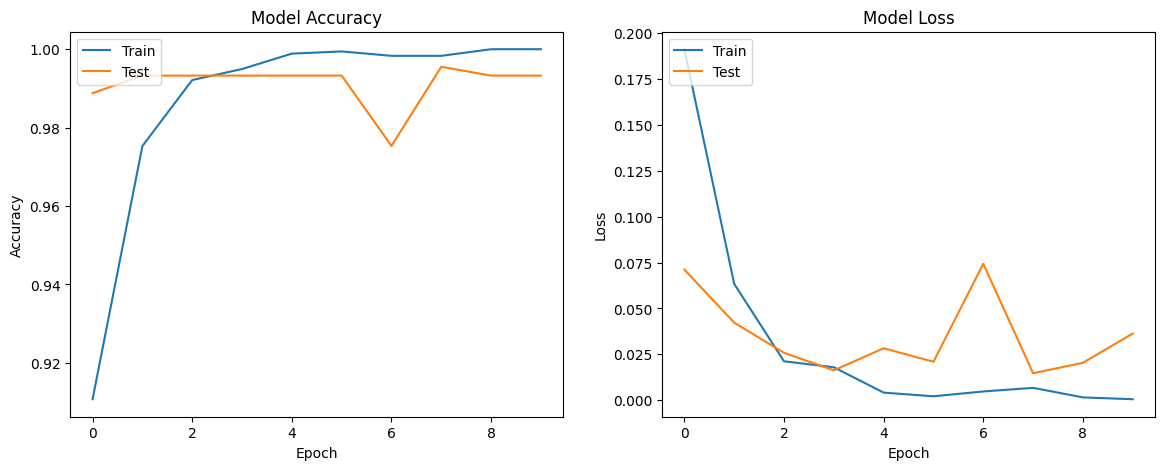

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

18/18 [==============================] - 1s 36ms/step


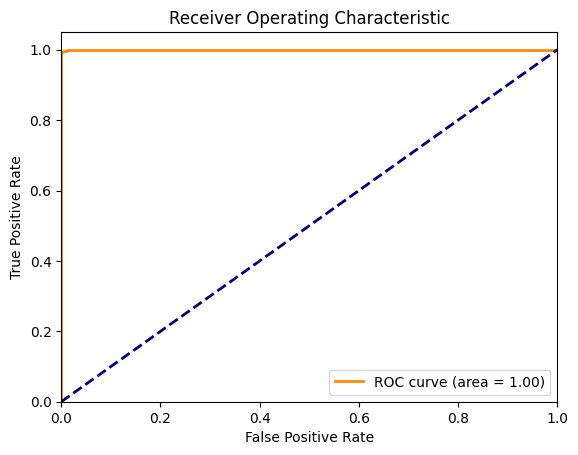

Confusion Matrix:
 [[240   3]
 [  0 314]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       243
         1.0       0.99      1.00      1.00       314

    accuracy                           0.99       557
   macro avg       1.00      0.99      0.99       557
weighted avg       0.99      0.99      0.99       557



In [ ]:
# Get the predicted probabilities for the positive class
y_pred_probs = model_new.predict(X_test)[:, 1]

# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Predict the classes based on the probability threshold (0.5)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

# Classification Report
cr = classification_report(y_test, y_pred_classes)
print('Classification Report:\n', cr)

In [ ]:
num_examples = 10

indices = np.random.choice(range(len(X_test)), num_examples)
test_examples = X_test[indices]

# Convert to a TensorFlow tensor
test_examples_tensor = tf.convert_to_tensor(test_examples, dtype=tf.float32)

# Define the GradientTape context
with tf.GradientTape() as tape:
    tape.watch(test_examples_tensor)
    predictions = model(test_examples_tensor)
    loss = predictions[:, class_idx]

# Get the gradients of the loss with respect to the inputs
gradients = tape.gradient(loss, test_examples_tensor)

# Process the gradients to create a saliency map
saliency_maps = tf.abs(gradients).numpy()

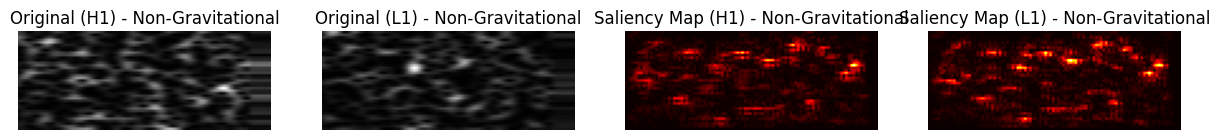

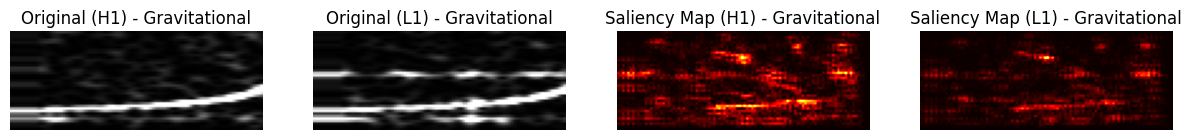

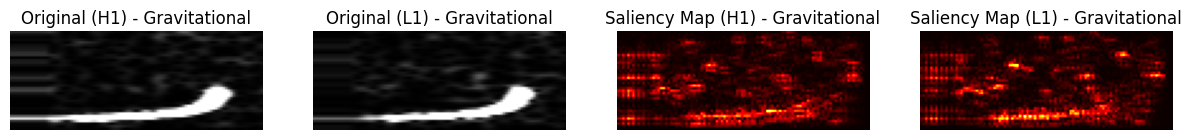

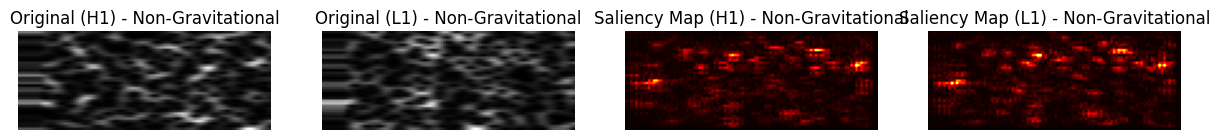

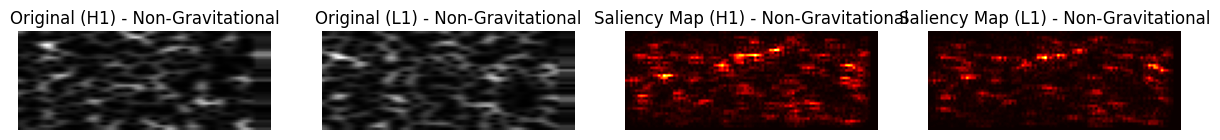

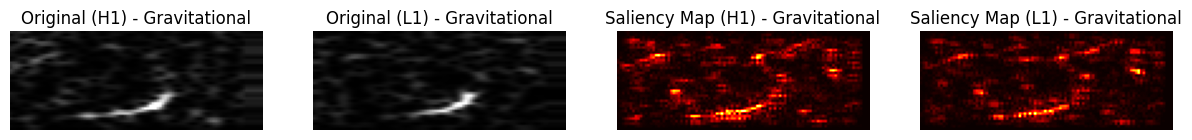

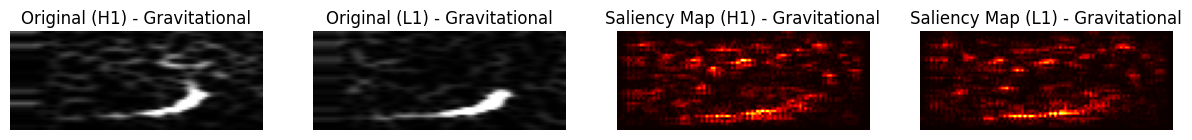

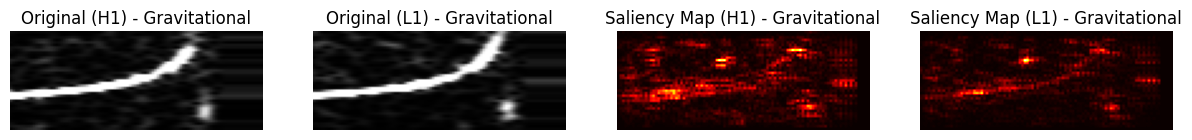

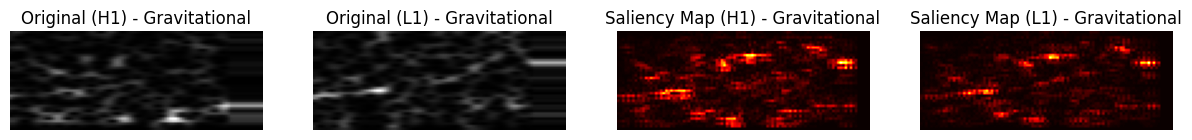

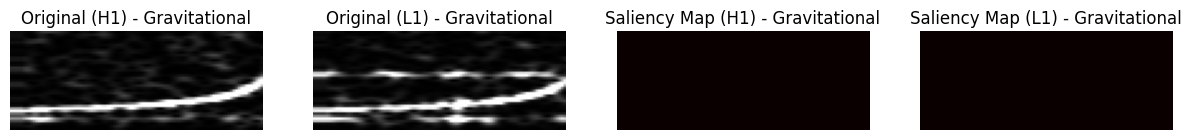

In [ ]:
# Plot the saliency maps
for i, (saliency_map, test_example) in enumerate(zip(saliency_maps, test_examples)):
    plt.figure(figsize=(15, 5))

    # Get the true label for the current example
    true_label = y_test[indices[i]]
    class_label = 'Gravitational' if true_label == 1 else 'Non-Gravitational'

    # Plot original H1 spectrogram
    plt.subplot(1, 4, 1)
    plt.title(f'Original (H1) - {class_label}')
    plt.imshow(test_example[:, :, 0], cmap='gray')
    plt.axis('off')

    # Plot original L1 spectrogram
    plt.subplot(1, 4, 2)
    plt.title(f'Original (L1) - {class_label}')
    plt.imshow(test_example[:, :, 1], cmap='gray')
    plt.axis('off')

    # Plot the saliency map for H1
    plt.subplot(1, 4, 3)
    plt.title(f'Saliency Map (H1) - {class_label}')
    plt.imshow(saliency_map[:, :, 0], cmap='hot')
    plt.axis('off')

    # Plot the saliency map for L1
    plt.subplot(1, 4, 4)
    plt.title(f'Saliency Map (L1) - {class_label}')
    plt.imshow(saliency_map[:, :, 1], cmap='hot')
    plt.axis('off')

    plt.show()


### Acknowledgements

A lot of the material came from my knowledge from Physics 161 taught by Prof. George Fuller and Kyle Kehrer.

### References

[1] https://www.stsci.edu/~marel/black_holes/encyc_mod3_q6.html

[2] Abbott, B. P., et al. “Observation of gravitational waves from a binary black hole merger.” Physical Review Letters, vol. 116, no. 6, 11 Feb. 2016, https://doi.org/10.1103/physrevlett.116.061102.

[3] Isi, Maximiliano, et al. “Testing the black-hole area law with GW150914.” Physical Review Letters, vol. 127, no. 1–2, 1 July 2021, https://doi.org/10.1103/physrevlett.127.011103.

[4] https://www.ligo.caltech.edu/page/gw-sources

[5] https://astrobites.org/2023/11/08/guide-to-gravitational-waves/

[6] https://www.ligo.caltech.edu/page/facts

[7] https://github.com/michelkana/Deep-learning-projects/tree/master/Project3/data

[8] https://towardsdatascience.com/2020-how-a-i-could-help-astronomers-sorting-big-data-811571705707
